# Polar formatting
NOTE: most content was taken from https://www.osti.gov/servlets/purl/1044949.  This report goes into much more depth on this topic and is a very intuitive and easy read.  I mainly re-wrote this to get a better understanding for myself

## Wavenumbers
Recall that early on we described a travelling wave moving in the $+x$ direction as:
$$h(t, x) = A\cos{(\omega t - kx)}$$ 
Where:
* $t$: time in seconds
* $x$ spatial distance in meters
* $\omega$: temporal frequency (temporal phase rate) in Hz 
* $k$: wavenumber (spatial phase rate) in $m^{-1}$
    - Often in SAR referred to as the spatial frequency

Looking at the phase we observe:
$$\omega t - kx = \omega(t - \frac{k}{\omega}x) = \omega(t - \frac{1}{c}x) = (\omega t - \frac{\omega}{c}x)$$  

Which means we can see that:
$$k = \frac{\omega}{c} = \frac{2\pi f}{c} = \frac{2\pi}{\lambda}$$
and subsequently 
$$k = \frac{\omega}{c} \implies c = \frac{\omega}{k}$$

The key thing to note here is that we call this wavenumber $k$ the "spatial frequency" of the wave.  This is important to note because synthetic aperture radar (SAR) imaging is more about processing wavenumber information than about frequency information.  We use frequecny information because frequecny and wavenumbers are related by the velocity of propogation (speed of light).  

In reality we have waves which propogate in three dimensional space which means we can re-write our equation of the wave as:
$$w(t, x, y, z) = A\cos{(\omega t - k_x x - k_y y - k_z z)}$$
which we can re-write in vectorized notation as
$$w(t, \mathbf{r}) = A\cos{(\omega t - \mathbf{k}\cdot \mathbf{r})}$$

where:
* $\mathbf{r}$: is a position vector in 3 dimensional space
* $\mathbf{k}$: is a wavenumber vector where the magnitude describes the spatial frequency and the direciton describes the wavefront propogation direction
we can re-write $\mathbf{k}$ as a magnitude and direction as:
$$\mathbf{k} = k\hat{\mathbf{n}}$$
where:
* $k$: magnitude of the wavenumber (spatial frequency)
* $\hat{\mathbf{n}}$: unit vector pointing in the direction the wave is travelling

We can now re-write the equation for a wave as:
$$w(t, \mathbf{r}) = A\cos{(\omega t - k\hat{\mathbf{n}}\cdot \mathbf{r})} = A\cos{(\omega t - k(\hat{\mathbf{n}}\cdot \mathbf{r}))}$$  

For now let's consider a two dimensional wave travelling in two dimensional space following the figure below:  

![wavefront](./images/wavefront.PNG)  

From this we can observe the following:
* The lines represent constant phase contours at a snapshot in time.
* The waves are travelling perpendicular to these constant phase contours

From this we can also see that:
$$k\hat{\mathbf{n}} \cdot \mathbf{r} = (k\cos{\theta})x + (k\sin{\theta})y$$

This will be an important result later.  

### Position estimate from wavenumbers
Lastly for wavenumbers let's define the phase of a one dimensional travelling wave as
$$\Theta = \omega t - kx$$  

Assume that we don't know the temporal frequency $\omega$ and that $k$ and $x$ are fixed over time, then we can estimate $\omega$ by
$$\omega = \frac{d\Theta}{dt}$$
This is clear by computing the derivative:
$$\frac{d\Theta}{dt} = \frac{d}{dt}(\omega t - kx) = \omega$$

We can estimate temporal frequency by observing how the phase changes over time.  The precision of the estimate (frequency resolution) depends on how long of an observation we have in time of $\Theta$.  

Similarly, if the phase is observed over a variety of frequencies then we cn estimate the time of an event in a similar manner.  Suppose that $t$ is unknown and that we observe the phase over a band of frequencies and that $k$ and $x$ are fixed.  Then we can form an estimate of $t$ by computing the derivative with respect to frequency:
$$\frac{d\Theta}{d\omega} = \frac{d}{d\omega}(\omega t - kx) = t \implies t = \frac{d\Theta}{d\omega}$$

Now suppose we wanted to estimate the wave's position $x$.  To do this we need to observe the phase over multiple wavenumbers and compute:
$$\frac{d\Theta}{dk} = \frac{d}{dk}(\omega t - kx) = x \implies x = \frac{d\Theta}{dk}$$   

This is preciesely what SAR imaging does.  Now with SAR we work with multi-dimensional data since we are estimating a two dimensional image, so we will re-write the phase in two spatial dimensions as:
$$\Theta = \omega t - (k_xx + k_yy)$$
Again, to estimate position we need ot obsrve wavenumbers at a fixed time.  For a fixed time this means that $\omega t$ will be constant; i.e) $\omega t = \phi$ which means we can re-write the phase as:
$$\Theta = \phi - (k_xx + k_yy)$$
Recall that in order to estimate $x$ we need to observe variation in $k_x$ over multiple wavenumbers and to estimate $y$ we need to observe $k_y$ over multiple wavenumbers i.e)
$$\frac{\partial\Theta}{\partial k_x} = \frac{\partial}{\partial k_x}(\phi - (k_xx + k_yy)) = -x \implies x = -\frac{\partial\Theta}{\partial k_x}$$
$$\frac{\partial\Theta}{\partial k_y} = \frac{\partial}{\partial k_y}(\phi - (k_xx + k_yy)) = -x \implies y = -\frac{\partial\Theta}{\partial k_y}$$
We need to find a way to estimate phase variation over these two different wavenumbers.  For the two dimensional problem recall that we defined $k_x$ and $k_y$ as:
$$k_x = k \cos{\theta}, \quad k_y = k\sin{\theta}$$
plugging those definitions we get:
$$\Theta = \phi - k\cos{(\theta)}x - k\sin{(\theta)}y$$
SAR allows us to independently vary both $k$ and $\theta$.  Variation in $k$ comes from us transmitting over multiple frequencies through our signals bandwidth.  The distance from where we send our pulse and receive it over slow time is what varies the angle the wavefront his a scatterer.

### Spatial fourier transform of a scene 
Consider a 2-dimensional physical scene with a brightness function that varies with position over the scene by $\sigma(x,y)$.  If we take the fourier transform of this function with respect to spatial coordinates $x$ and $y$ then we end up with:
$$S(k_x, k_y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\sigma(x, y)e^{-j(k_x x + k_y y)}dxdy$$  

If we can gather enough information in the wavenumber domain, which we'll refer to as the  Fourier space of the scene, we should be able to estimate what the scene content function $\sigma(x, y)$ is. How well we are able to estimate this will end corresponding to how many large our observation is in the fourier domain.  For SAR this means if we have more signal bandwidth then we will have a better estimate of the y dimension of the scene function and if we dwell on a point longer we will have a better estimate of its x coordinate.  

## SAR as wavenumbers
Recall that our signal model post motion compensation is given by:
$$X_{IF}(n, m) = H(\omega)e^{-j\omega [n](n_{fast}[m] - n_{scp}[m])}e^{-j\omega(\tau[m] -  \tau_{scp}[m])}$$
$$x_{IF}(t, \tau) = Ae^{\frac{-4\pi R(\tau)}{\lambda}}e^{\pi \gamma (t-\frac{2R(\tau)}{c})^2}$$
$$x_{IF}(t, \tau) = Ae^{j \omega (\tau - \tau_{scp})}e^{\pi \gamma (t - \tau - \tau_{scp})^2}$$

$$e^{j\left( - 2\pi f_c\tau_{rx} - 2\pi \gamma t\tau + \pi \gamma \tau_{rx}^2 \right)}$$
$$e^{j\left( - 2\pi f_c(\tau - \tau_{scp}) - 2\pi \gamma t(\tau - \tau_{scp}) + \pi \gamma \tau_{rx}^2 \right)}$$
$$e^{j\left( - 2\pi f_c(\tau - \tau_{scp}) - 2\pi \gamma t(\tau - \tau_{scp})\right)}$$
$$e^{j\left( (\tau - \tau_{scp})(- 2\pi f_c - 2\pi \gamma t)\right)}$$
let the distance to the mocomp point be $R_m$ then we can write the time delay as:
$$e^{j\left(\frac{2R_m}{c}(- 2\pi f_c - 2\pi \gamma t)\right)}$$



## Visualizing wavenumber space
Let's plot what the wavenumber (spatial frequency) extents of a collection look like:

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
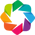

In [1]:
import holoviews as hv
import holoviews.operation.datashader as hd
hv.extension('bokeh')

In [2]:
from sarpy.io.phase_history.cphd import CPHDReader
reader = CPHDReader('/mnt/c/Users/Austin/Documents/GitHub/radar_learning/8_polar_formatting/2023-11-14-03-38-20_UMBRA-04_CPHD.cphd')
meta = reader.cphd_meta

In [3]:
num_pulses = meta.Data.Channels[0].NumVectors
num_samples = meta.Data.Channels[0].NumSamples
ref_pulse = num_pulses // 2

tx_pos = reader.read_pvp_variable('TxPos', index=0)
rx_pos = reader.read_pvp_variable('RcvPos', index=0)
srp_pos = reader.read_pvp_variable('SRPPos', index=0)
tx_time = reader.read_pvp_variable('TxTime', index=0)
arp_vel = reader.read_pvp_variable('TxVel', index=0)


In [52]:
# Compute the polar angle over the collection
import numpy as np
coa_los = srp_pos[ref_pulse] - tx_pos[ref_pulse]
u_coa_los = coa_los / np.linalg.norm(coa_los)
los = srp_pos - tx_pos
u_los = los / np.linalg.norm(coa_los, axis=-1)
dot_prod = np.einsum('k,jk -> j', u_coa_los, u_los)
polar_angle = np.arccos(1 - dot_prod) - np.pi/2


In [54]:
hv.Curve(polar_angle).opts(
    show_grid=True,
    xlabel='slow time index',
    ylabel='polar angle',
    width=500,
    height=500,
)

:Curve   [x]   (y)

In [57]:
rf_bw = meta.TxRcv.TxWFParameters[0].RFBandwidth
fc = meta.TxRcv.TxWFParameters[0].FreqCenter
freq_vec = np.linspace(fc - rf_bw/2, fc + rf_bw/2, num_samples)

In [58]:
f, theta = np.meshgrid(freq_vec, polar_angle, indexing='ij')

In [60]:
# Compute spatial frequency extents 
from scipy.constants import c as speed_of_light
wavelen = speed_of_light / f 
k_x = 2 * np.pi / wavelen * np.cos(theta)
k_y = 2 * np.pi / wavelen * np.sin(theta)

In [61]:
points = np.stack([k_x[::50, ::50].flatten(), k_y[::50, ::50].flatten()], axis=-1)
k_space = hv.Points(
    points,
    label='k-space',
).opts(
    width=600,
    height=600,
    xlabel='k_x',
    ylabel='k_y',
    title='Spatial Frequency',
)
k_space

:Points   [x,y]

# Talk about goal of image formation processor and tradeoffs
Assuming the data has been matched filtered and motion compensated, then the goal of an image formation processer is to take the spectral data in the spatial frequency domain and convert it back to the image domain via a fourier transform.  This transform has the form:
$$S(x, y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}x_{IF}(n, m)e^{-j(k_x x + k_y y)}dxdy$$  

As we have seen the support in the spatial frequency domain ($k$ space) has non uniform spacing.  This breaks the assumption of uniformly spaced samples for the fast fourier transform.  There are a few Image formation techniques that try to address this problem in different ways:

|algorithm | description | computational complexity|
| -------- | ----------- | ----------------------- |
|backprojection|Performs "slow" fourier transform| inefficient |
|polar formatting |Interpolates data from a polar grid to an evenly spaced grid to make use of the fast fourier transform| efficient |
|range migration algortithm |I don't know enough about this one| efficient |

ERIM is known for developing the polar formatting algorithm which is implemented in all of the IFPs at this company and is what we will discuss for today.  In the future it would be great to include backprojection/RMA!

# Polar formatting
Polar formatting solves the non uniformly spaced spatial frequency samples by interpolating the data to a rectilinear grid with even spacing.  Doing this allows the use of a fast fourier trasnform which is much more computationally efficient than performing the "slow" non-uniform fourier transform over the spatial frequency domain.  

There are two interpolation grid strategies:
1. inscribe: Create a rectangualar grid which resides completely within the polar annulus
    - Used primarily.  Doesn't work as well with high squint angles
3. excribe: Create a rectangular grid which envelops the entire polar annulus
    - Works well when data is squinted

In [65]:
inscribed = hv.Rectangles(
    (k_x.flatten().min() + 0.1, k_y.flatten().min() + 0.1, k_x.flatten().max() - 0.1, k_y.flatten().max() - 0.1),
    label='interpolation grid',
).opts(
    fill_color='none'
) 
exscribed = hv.Rectangles(
    (k_x.flatten().min() - 0.1, k_y.flatten().min() - 0.1, k_x.flatten().max() + 0.1, k_y.flatten().max() + 0.1),
    label='interpolation grid',
).opts(
    fill_color='none'
) 
hv.Layout([
    (k_space.opts(width=450, height=450) * inscribed).opts(title='inscribed'), 
    (k_space.opts(width=450, height=450) * exscribed).opts(title='exscribed')
]).cols(2)

:Layout
   .Overlay.I  :Overlay
      .Points.K_hyphen_minus_space   :Points   [x,y]
      .Rectangles.Interpolation_grid :Rectangles   [x0,y0,x1,y1]
   .Overlay.II :Overlay
      .Points.K_hyphen_minus_space   :Points   [x,y]
      .Rectangles.Interpolation_grid :Rectangles   [x0,y0,x1,y1]

Once the interpolation grid is determined, interpolation to the evenly spaced grid occurs in two steps:
1. Range interpolation: for each pulse, fix the wavefrom direction ($k_y$) and interpolate the range frequency to the evenly spaced grid
    - This step makes the spatail frequency look like a trapezoid
2. Azimuth interpolation: for each sample along range requency ($k_x$) interpolate the azimuth frequency to the evenly spaced grid
    - This step makes the spatial frequency look like a rectangular grid

## Determining the polar format interpolation grid
Here we will find the largest box which inscribes the polar annulus.  Key things to note when forming the interpolation grid:
* Resolution (range/azimuth) of our image will be determined by the extents (bandwidth) of the grid.  The physical scene size in the image domain does not correspond to the extent of the interpolation grid in the spatial frequency domain 
    - Smaller extent -> lower resolution, larger extent -> higher resolution
* Phsyical image extent in the image domain will be determined by the sample spacing of the interpolation grid
    - coarser sample spacing -> less scene content, finer sample spacing -> more scene content
 
For this example we will find the largest bandwidth which inscribes the polar annulus

In [78]:
# find overall bandwidth
k_x_max = np.max(k_x.flatten())
k_x_min = np.min(k_x.flatten())

k_y_max = np.max(k_y.flatten())
k_y_min = np.min(k_y.flatten())

k_x_bw = k_x_max - k_x_min
k_y_bw = k_y_max - k_y_min

print(f'{k_x_max=}, {k_x_min=}, {k_x_bw=}')
print(f'{k_y_max=}, {k_y_min=}, {k_y_bw=}')

k_x_max=np.float64(210.27681650744006), k_x_min=np.float64(204.22429641019897), k_x_bw=np.float64(6.052520097241086)
k_y_max=np.float64(0.9599535017522406), k_y_min=np.float64(-0.9578612992565522), k_y_bw=np.float64(1.9178148010087928)


In [79]:
# find interpolation grid bandwidth
k_x_lower_bound = np.max(k_x[0, :])
k_x_upper_bound = np.min(k_x[-1, :])

k_y_lower_bound = np.min(k_y[:, 0])
k_y_upper_bound = np.max(k_y[:, -1])

print(f'{k_x_lower_bound=}, {k_x_upper_bound=}')
print(f'{k_y_lower_bound=}, {k_y_upper_bound=}')

# k_x_lower_bound=np.float64(-.9)
# k_x_upper_bound=np.float64(.9)
# k_y_lower_bound=np.float64(204.5)
# k_y_upper_bound=np.float64(210)


k_x_lower_bound=np.float64(204.22642455810873), k_x_upper_bound=np.float64(210.2746253112298)
k_y_lower_bound=np.float64(0.9323323163300775), k_y_upper_bound=np.float64(-0.9303003137429977)


Let's plot what the polar annulus and the interpolation grid look like

In [80]:
inscribed_area = hv.Rectangles(
    (k_x_lower_bound, k_y_lower_bound, k_x_upper_bound, k_y_upper_bound),
    label='interpolation grid',
).opts(
    fill_color='none',
)
(k_space * inscribed_area).opts(
    show_legend=True
)

:Overlay
   .Points.K_hyphen_minus_space   :Points   [x,y]
   .Rectangles.Interpolation_grid :Rectangles   [x0,y0,x1,y1]

Now we create the interpolation grid:

In [83]:
k_x_interp = np.linspace(k_x_lower_bound, k_x_upper_bound, num_samples)
# k_x_interp = np.linspace(k_y_lower_bound, k_y_upper_bound, num_samples)
k_x_interp.shape
k_x_interp

array([204.22642456, 204.22712474, 204.22782493, ..., 210.27322494,
       210.27392513, 210.27462531])

In [84]:
k_y_interp = np.linspace(k_y_lower_bound, k_y_upper_bound, num_pulses)
# k_y_interp = np.linspace(k_x_lower_bound, k_x_upper_bound, num_pulses)
# k_y_interp = np.linspace(k_x_upper_bound, k_x_lower_bound, num_pulses)

k_y_interp.shape
k_y_interp

array([ 0.93233232,  0.93211748,  0.93190264, ..., -0.92987064,
       -0.93008548, -0.93030031])

## Performing polar formatting
Now we can read the data to resample it to an evenly spaced grid

In [85]:
phase_history = reader[:, :]
cphd = phase_history.copy()

In [86]:
print(phase_history.shape)
print(num_pulses, num_samples)

(8671, 8639)
8671 8639


In [87]:
from scipy.interpolate import interp1d

def complex_interp(x_new, x, y):
    re_interpolator = interp1d(x, np.real(y), kind='linear', fill_value=0, bounds_error=False)
    im_interpolator = interp1d(x, np.imag(y), kind='linear', fill_value=0, bounds_error=False)
    return re_interpolator(x_new) + 1.0j * im_interpolator(x_new)


## Range Interpolation

In [88]:
range_interpolated = np.zeros((num_pulses, k_x_interp.shape[0]), dtype=np.complex64)
for i_pulse in range(num_pulses):
    _wavelen = speed_of_light / freq_vec 
    _k_x = 2 * np.pi / _wavelen * np.cos(polar_angle[i_pulse])
    range_interpolated[i_pulse, :] = complex_interp(k_x_interp, _k_x, phase_history[i_pulse, :])

In [89]:
hd.rasterize(
    hv.Image(np.log10(np.abs(range_interpolated)))
).opts(width=600, height=600, colorbar=True)

:DynamicMap   []
   :Image   [x,y]   (z)

## Azimuth interpolation

In [90]:
az_interp = np.zeros((k_y_interp.shape[0], range_interpolated.shape[1]), dtype=np.complex64)
for i_sample in range(az_interp.shape[1]):
    _wavelen = speed_of_light / freq_vec
    _k_y = 2 * np.pi / _wavelen[i_sample] * np.sin(polar_angle)
    az_interp[:, i_sample] = complex_interp(k_y_interp, _k_y, range_interpolated[:, i_sample])

In [91]:
hd.rasterize(
    hv.Image(np.log10(np.abs(az_interp)))
).opts(width=600, height=600)

:DynamicMap   []
   :Image   [x,y]   (z)

## Form the image!

In [92]:
img = np.fft.fftshift(np.fft.fft2(az_interp), axes=(0, 1))
cphd_img = np.fft.fftshift(np.fft.fft2(cphd), axes=(0, 1))

In [93]:
from sarpy.visualization.remap import pedf

hd.rasterize(
    hv.Image(pedf(img))
).opts(
    width=600,
    height=600,
    cmap='gray',
)

:DynamicMap   []
   :Image   [x,y]   (z)

## Compare the image before/after polar formatting

In [94]:
hd.rasterize(
    hv.Image(pedf(img))
).opts(
    width=500,
    height=500,
    title='polar formatted',
    cmap='gray',
    # shared_axes=False,
) + hd.rasterize(
    hv.Image(pedf(cphd_img))
).opts(
    width=500,
    height=500,
    title='2D FFT of CPHD',
    cmap='gray',
    # shared_axes=False,
)

:Layout
   .DynamicMap.I  :DynamicMap   []
      :Image   [x,y]   (z)
   .DynamicMap.II :DynamicMap   []
      :Image   [x,y]   (z)

In [97]:
from sarpy.io.complex.sicd import SICDReader
r = SICDReader('/mnt/c/Users/Austin/Documents/GitHub/radar_learning/8_polar_formatting/2023-11-14-03-38-20_UMBRA-04_SICD.nitf')
pixels = r[:, :]

In [98]:
hd.rasterize(
    hv.Image(pedf(pixels))
).opts(
    width=500,
    height=500,
    title='umbra',
    cmap='gray',
    # shared_axes=False,
)

:DynamicMap   []
   :Image   [x,y]   (z)